In [1]:
### Checkear los datos: data types, number of columns and rows, number of nulls...

### describir los datos: estadísticas descriptivas, interpretación de resultados, visualización de datos

### Añadir más datos que puedan ser útiles, pivot tables...

### Kaaaaaggle: tiene microcursos gratuitos

In [13]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

student = pd.read_csv('/Users/ljgoico/downloads/student-mat.csv')

In [4]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
student.shape

(395, 33)

In [9]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### Descripción de datos

In [10]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


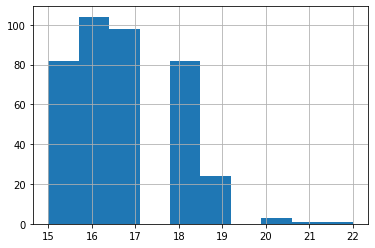

In [14]:
#vamos a estudiar la edad con un histograma y un boxplot

student['age'].hist() # or student.age.hist()

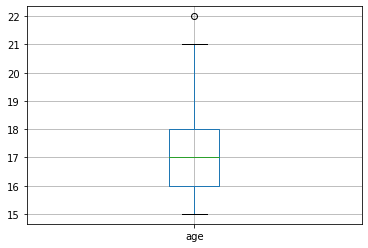

In [16]:
student.boxplot(column = ['age'])

#hay ouliers por arriba, en el valor 22

In [17]:


pd.crosstab(index=student.sex, columns='count')

col_0,count
sex,
F,208
M,187


In [18]:
#estudiantes que han participado en actividades extracurriculares, por género
pd.crosstab(index=student.sex, columns = student.activities)

activities,no,yes
sex,,
F,112,96
M,82,105


In [19]:
#podemos mirar al tipo de dirección vs. family size
pd.crosstab(index=student.address, columns = student.famsize)

famsize,GT3,LE3
address,,
R,68,20
U,213,94


## New columns and pivot tables

In [20]:
#we'd like to know how many students improved their grade between the first and second period

student['notes'] = np.where(student.G2>student.G1, "PA", "NM")

In [22]:
pd.crosstab(index=student.school, columns = student.notes)

notes,NM,PA
school,,
GP,228,121
MS,39,7


In [23]:
#pivotemos la media de la nota por colegio, sexo y horas de estudio semanales
# por defecto saca la media
student.pivot_table(index = ['school'], columns = ['sex', 'studytime'], values=['G3'])

G3                                                    \
sex                F                                      M              
studytime          1          2          3     4          1          2   
school                                                                   
GP         10.652174   9.363636  10.590909  11.0  10.363636  11.090909   
MS          5.250000  10.428571  11.571429   NaN   8.750000  10.875000   

                            
sex                         
studytime          3     4  
school                      
GP         13.923077  11.7  
MS         13.000000   NaN

In [24]:
student.pivot_table(index = ['school'], columns = ['sex', 'studytime'], values=['G3'], aggfunc='count')

G3                                          
sex           F                       M                  
studytime     1     2     3     4     1     2     3     4
school                                                   
GP         23.0  99.0  44.0  17.0  66.0  77.0  13.0  10.0
MS          4.0  14.0   7.0   NaN  12.0   8.0   1.0   NaN

## Correlations

In [25]:
student.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


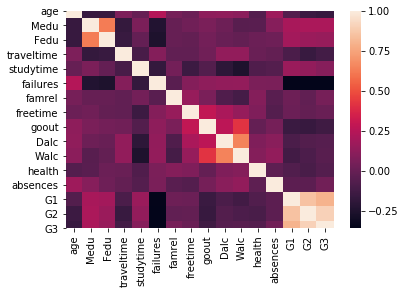

In [26]:
# library
import seaborn as sns

# Default heatmap: just a visualization of this square matrix
p1 = sns.heatmap(student.corr())